In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
60409,1087,4,103.41
11456,1439,3,165.78
428,2128,1,135.59
76577,3726,3,160.36
48075,3677,1,56.09


In [3]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08     , 0.25     ],
       [0.5625   , 0.75     ],
       [0.2      , 0.5      ],
       ...,
       [0.81375  , 0.5      ],
       [0.764375 , 0.       ],
       [0.4371875, 0.5      ]])

In [4]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.06478571],
       [0.64285714],
       [0.22857143],
       ...,
       [0.72085714],
       [0.07207143],
       [0.00185714]])

Les données sont chargées à partir du fichier CSV, et les caractéristiques "area" et "bedrooms" ainsi la variable cible "price" sont mises à l'échelle entre 0 et 1.

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    nb_features = X.shape[1]
    w = np.ones(shape=(nb_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predict = np.dot(w, scaled_X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predict))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predict)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.mean(np.square(y_true - y_predict))
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list

start_time_batch = time.time()
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
end_time_batch = time.time()
w, b, cost

(array([-0.00300753, -0.00209056]), 0.5027080602335645, 0.08348293376213456)

Cette fonction effectue la descente de gradient par batch. Elle initialise les poids (w) et le biais (b), puis ajuste ces paramètres pour minimiser la fonction de coût sur l'ensemble des données.

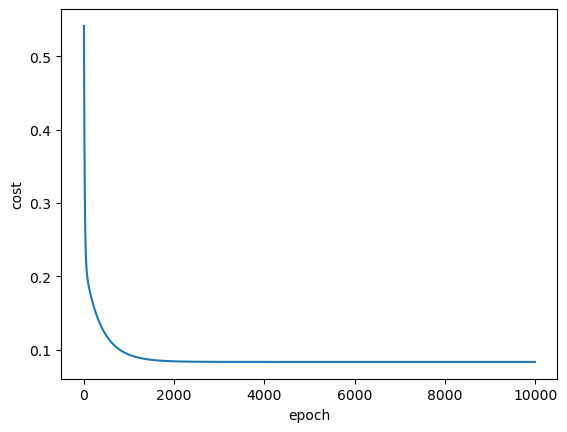

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [7]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area,bedrooms]])[0]

    scaled_price = w[0]*scaled_X[0] + w[1]*scaled_X[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


99.92277720464628

La fonction predict utilisent les poids et les biais appris pour faire des prédictions sur les prix des maisons en fonction de la superficie et du nombre de chambres.

In [8]:
predict(1000,2,w,b)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


100.27964310148619

In [9]:
time_batch = end_time_batch - start_time_batch

print(f"Temps d'execution pour Batch : {time_batch} secondes")

Temps d'execution pour Batch : 10.472429990768433 secondes


# Stochastic Gradient Descent Implementation

In [10]:
import random
random.randint(0,6)

1

In [11]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # enregistre le coût et l'epoch toutes les 100 itérations
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

start_time_sgd = time.time()
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
end_time_sgd = time.time()
w_sgd, b_sgd, cost_sgd

(array([0.99944107, 0.99936944]),
 -0.0008395475658134256,
 0.0025829060499022688)

Cette fonction implémente la descente de gradient stochastique. À chaque itération, elle utilise un exemple aléatoire pour mettre à jour les poids et le biais, ce qui rend le processus plus rapide mais potentiellement plus bruité.

In [12]:
w, b, cost

(array([-0.00300753, -0.00209056]), 0.5027080602335645, 0.08348293376213456)

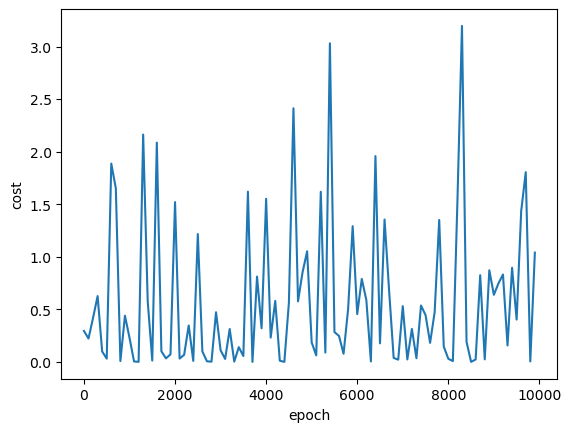

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [14]:
predict(2600,4,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


213.5222389419533

In [15]:
predict(1000,2,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


73.60550312906966

In [16]:
predict(1500,3,w_sgd,b_sgd)

/Users/sims/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


130.44620697643234

In [17]:

time_sgd = end_time_sgd - start_time_sgd

print(f"Temps d'execution pour la méthode stochastique : {time_sgd} secondes")

Temps d'execution pour la méthode stochastique : 0.04424405097961426 secondes


In [20]:
time_diff = time_batch - time_sgd
time_try = time_batch / time_sgd

print(f"Différence de temps : {time_diff} secondes")
print(time_try)

Différence de temps : 10.428185939788818 secondes
236.6969063387454
